# 1. K - 평균 알고리즘 이해

**`중심과 구성데이터를 변경하는 알고리즘`**

## 사이킷런 KMeans 클래스 소개

## K - 평균을 이용한 붓꽃 데이터 세트 군집화

모듈 로드   
데이터 로드  
헤드 3개 찍기

In [53]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 더 편리한 데이터 핸들링을 위해 DataFrame 으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length',
                                                   'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


KMeans  모델에 학습  
  
  

`n_clusters` 
- 분류하는 그룹 수

`k-means++`
- 디폴트 값

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

군집 결과 출력

In [55]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


실제 데이터 값과 분류 데이터 비교

In [56]:
irisDF['target'] = iris.target  
irisDF['cluster'] = kmeans.labels_  
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


시각 화 를 위한 차원 축소
- 데이터 의 속성이 4개 이므로 시각화 불가능
    - 2개로 차원 축소

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0] 
irisDF['pca_y'] = pca_transformed[:, 1] 
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,clsuter,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,1,-2.888991,-0.144949


라벨 이 3개이다  
라벨별 마커 색깔을 다르게 해서 시각화

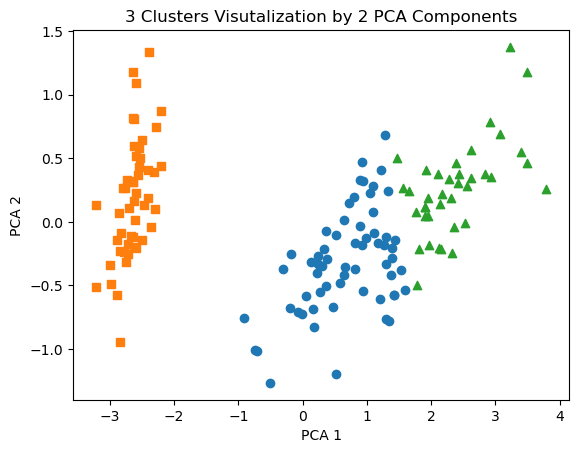

In [59]:
#  군집 값이 0, 1, ,2 인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster'] ==0].index
marker1_ind = irisDF[irisDF['cluster'] ==1].index
marker2_ind = irisDF[irisDF['cluster'] ==2].index

# 군집 값 0, 1, 2 에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker = '^')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visutalization by 2 PCA Components')
plt.show()


## 군집화 알고리즘 테스트를 위한 데이터 생성

`skelarn` 의 `make_blobs` 을 통한 데이터 생성

`n_samples`
- 데이터 수

`n_features`
- 피처의 수

`centers`
- 군집화 기반 분포도  


y 타켓 값 의 분포 확인

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


데이터 프레임으로의 변환  

columns
- ftr1
- ftr2

target
- y

In [61]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


target =(0, 1, 2) 의 plot 찍어 보기

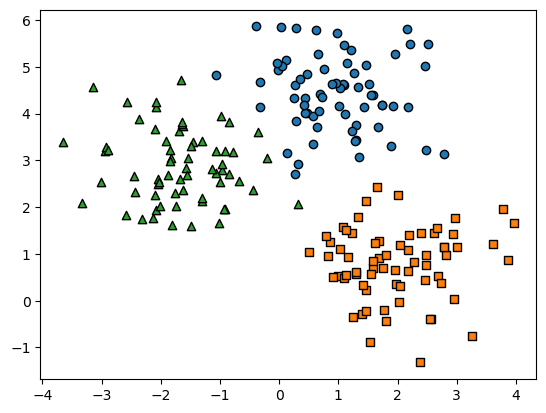

In [62]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성하였으므로 target_list 는 [0, 1, 2]
# target == 0, target == 1, target == 2 로 scatter plot을 marker 별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k',
                marker = markers[target])
plt.show()

K-Means 를 이용한 클러스터링 실행    
각 클러스터 별 중심 좌표 시각화  
중심이동 해가면서 clustering(군집화) 실행  
시각화


c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


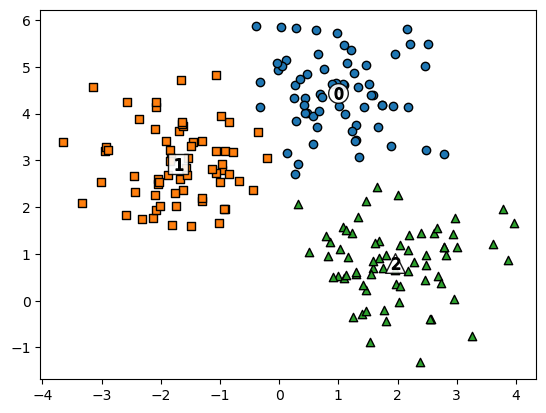

In [63]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 3, init ='k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추춣
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y  = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor = 'k',
                marker = markers[label] )
    
    # 군집 별 중심 위치 좌표 시각화
    plt.scatter( x = center_x_y[0], y = center_x_y[1], s = 200, color =  'white',
                alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k',
                marker = '$%d$' % label)
    
plt.show()

실제 값과 분류값 비교해보기  
큰 차이 없음

In [64]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# 2. 군집 평가(Cluster Evlauation)

**`군집의 중심부터 데이터 간의 거리를 통해 군집을 평가하는 방법`**

## 실루엣 분석의 개요

## 붓꽃 데이터 세트를 이용한 군집 평가

데이터 로드  
실루엣 분석 값 구함  

맨처음 데이터 3개를 불러왔을떄는 공통적으로 1번 군집이고  평균적으로 0.8 이라는 높은 점수를 보이나   
다른 군집의 점수 가 낮기에   `average_score` 는 0.553 가 나왔다

In [65]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표  값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape) 

# irisDF 에 실루엣 계수 칼럼 추가
irisDF['silhouette_coef'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)  

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coef
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


클러스터 군집 별 평균 값 구함
 

1번 군집이 제일 높은 0.79 기록하나  
0, 2 번 군집이 0.4 점대 기록

In [66]:
irisDF.groupby('cluster')['silhouette_coef'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coef, dtype: float64

## 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

실루엣 계수 2, 3, 4, 일 때 시각화  

실루엣 계수 == 4 일떄 제일 성능 좋음
- 군집별 평균 실루엣 값 균일
- 성능도 실루엣 계수 == 2 일 때와 크게 차이 나지 않음

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901


c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4358297989156284


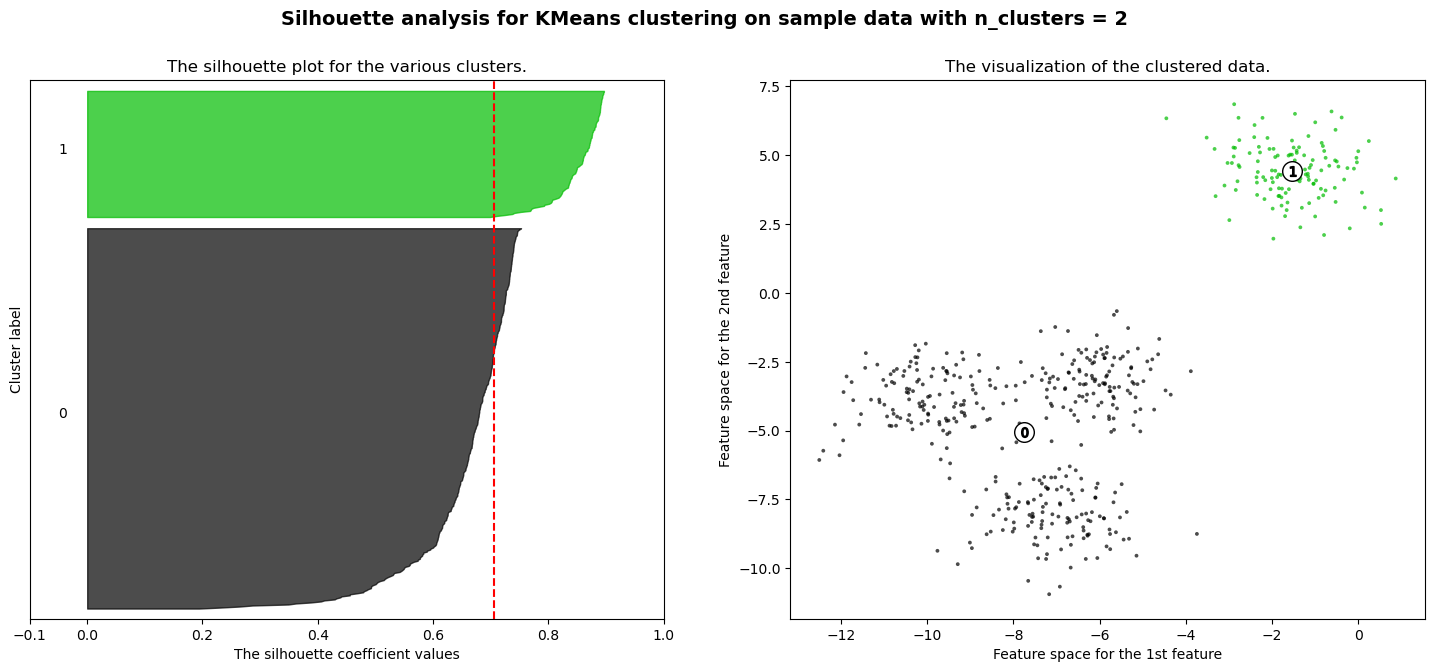

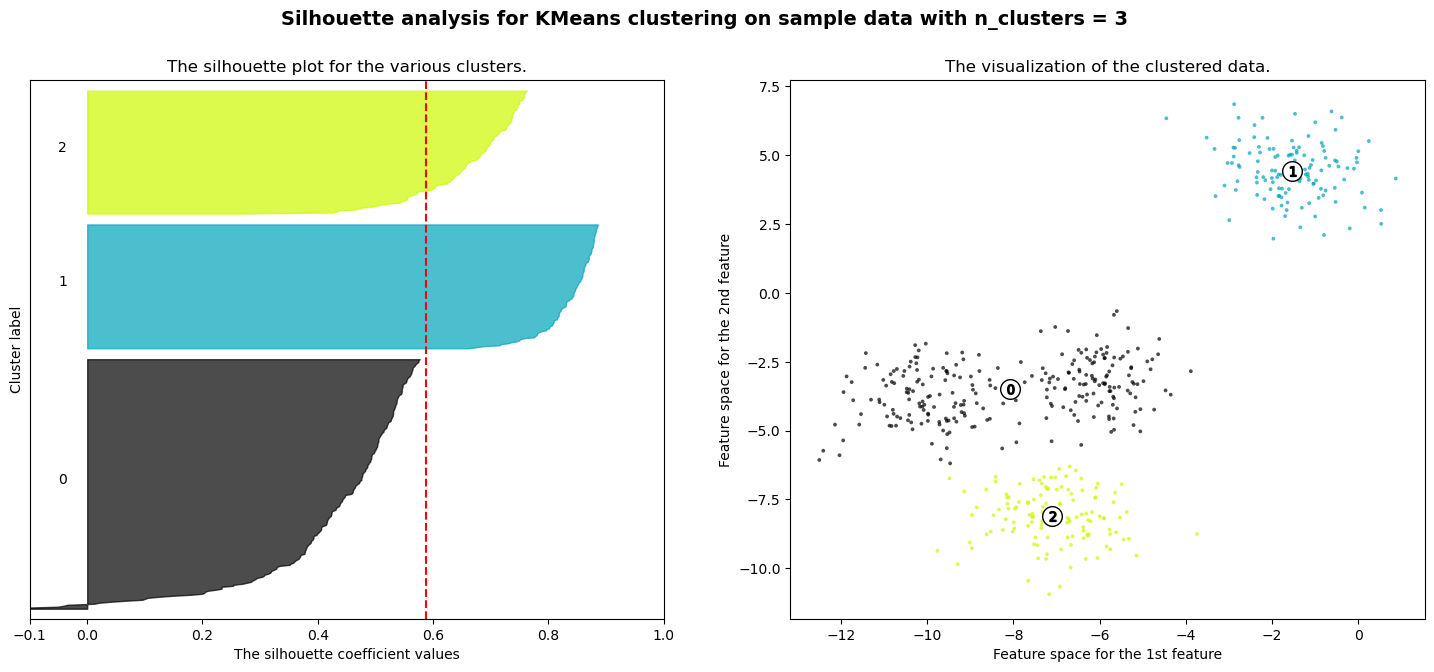

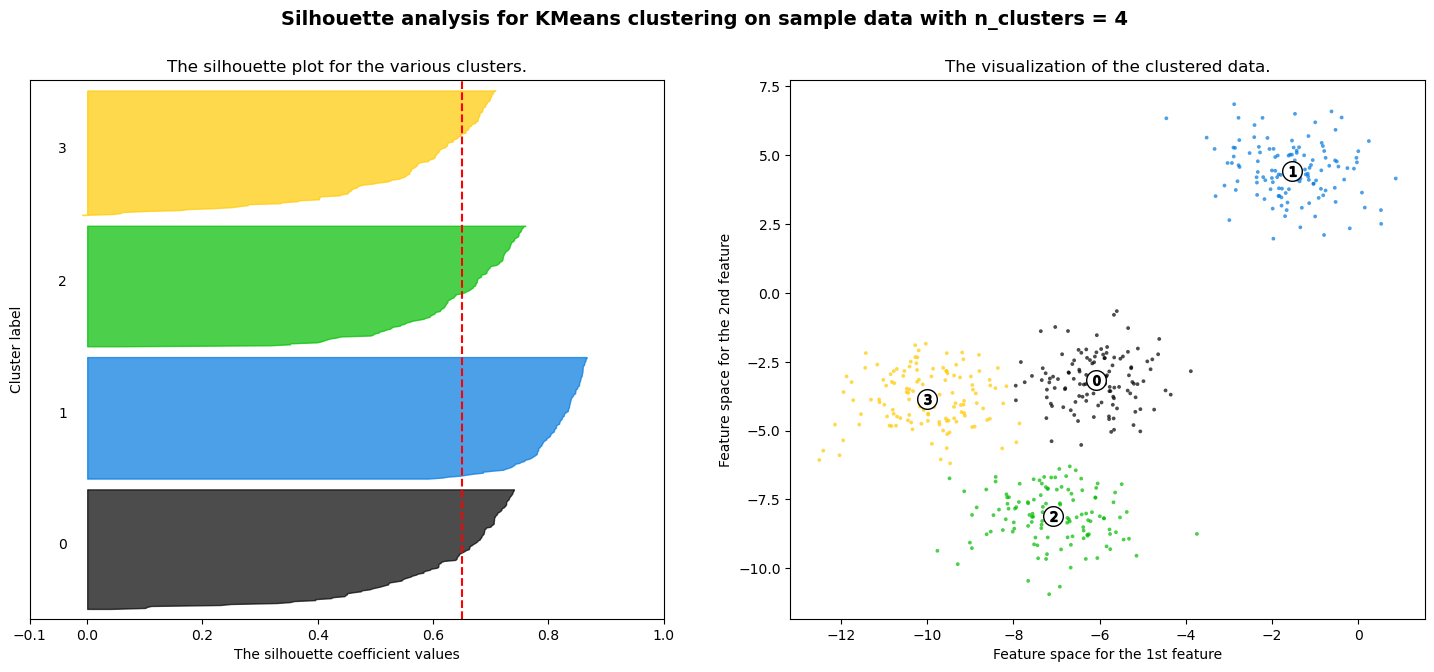

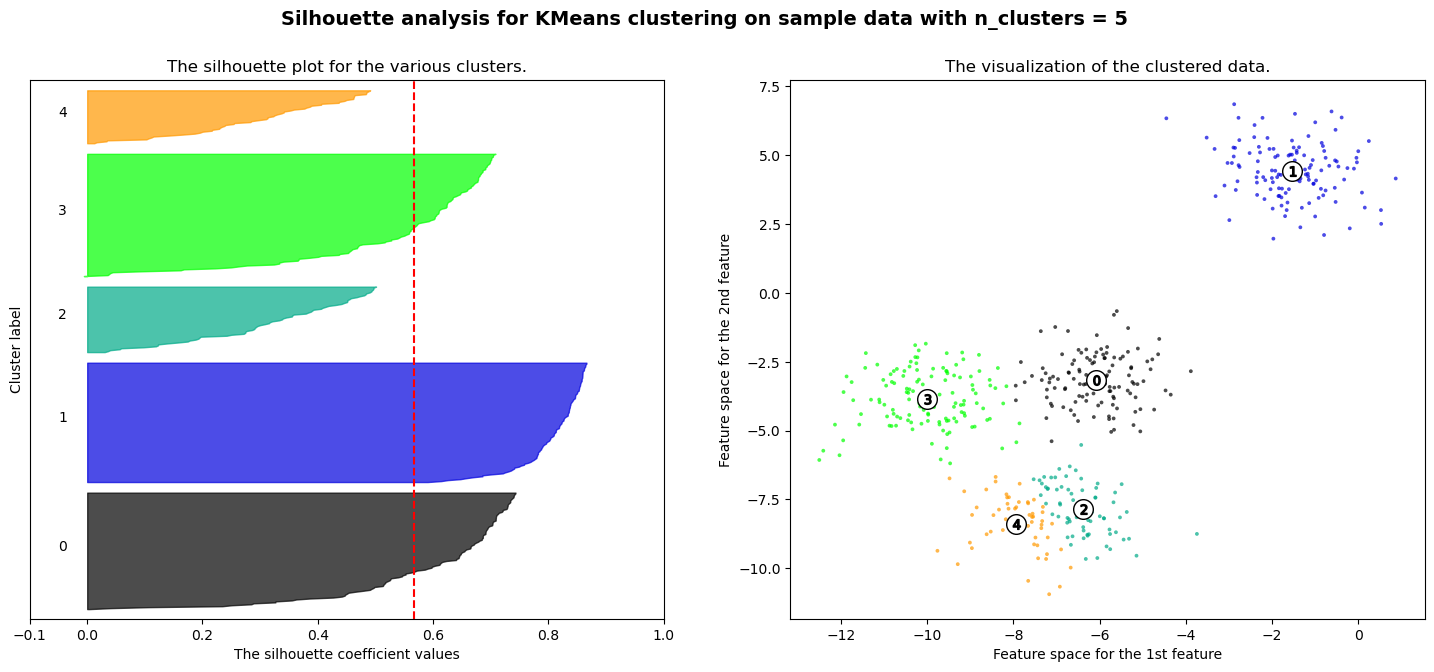

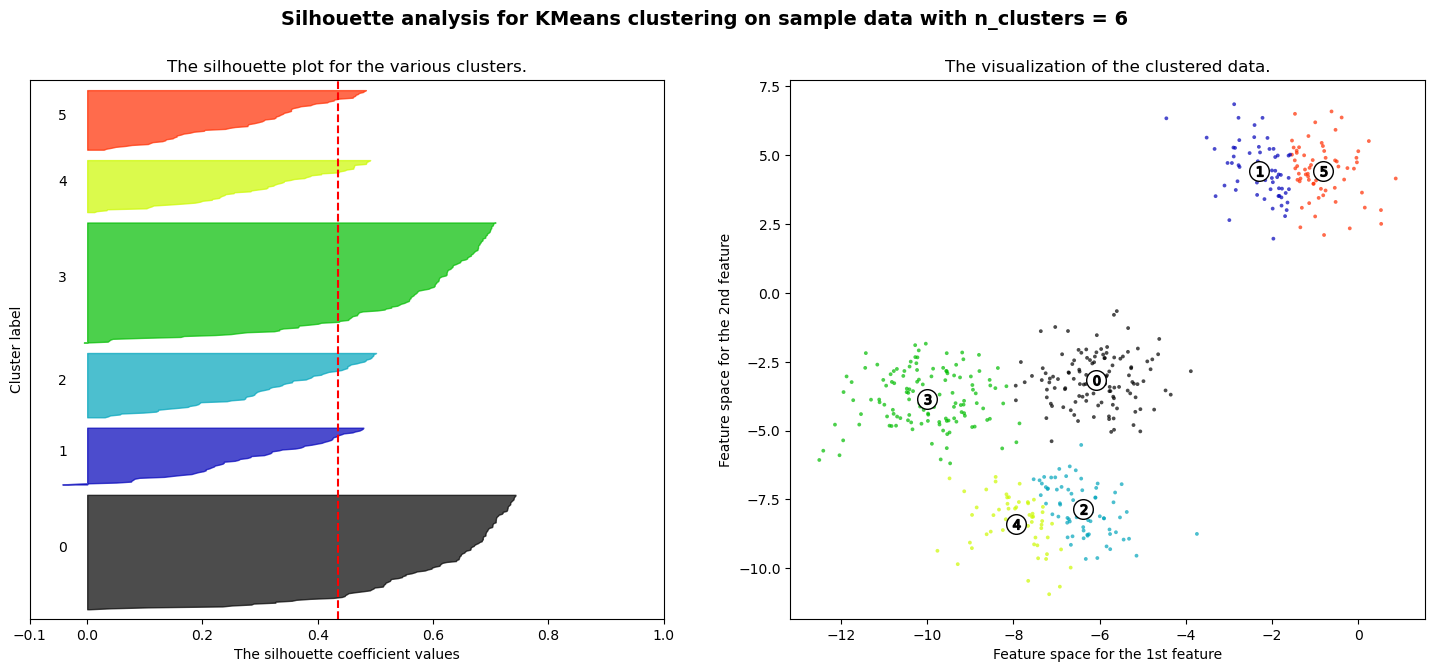

In [67]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [68]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


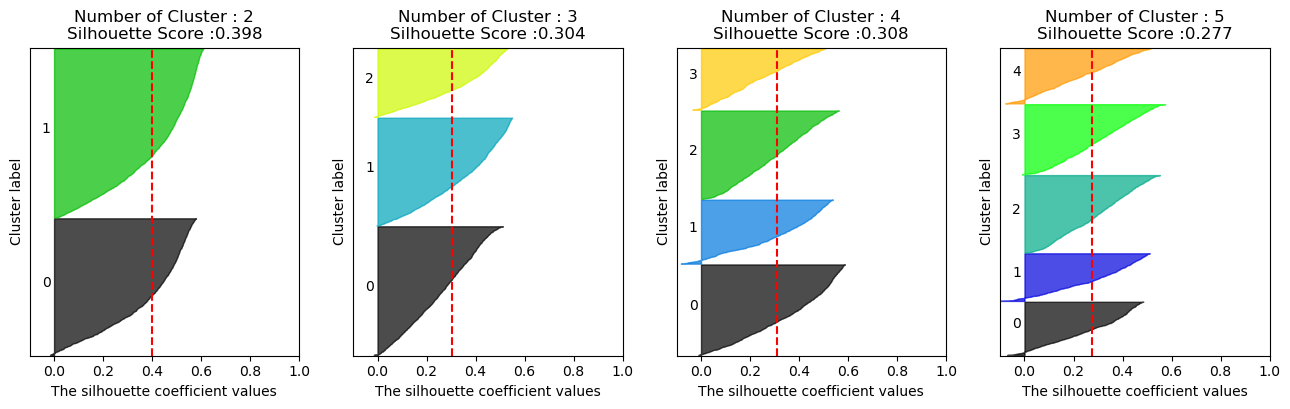

In [69]:
# visualize_silhouette([2, 3, 4, 5], X_features)

데이터 세트 생성  
생성 데이터의 최적 실루엣 계수 평균값 시각화

4개 최적

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

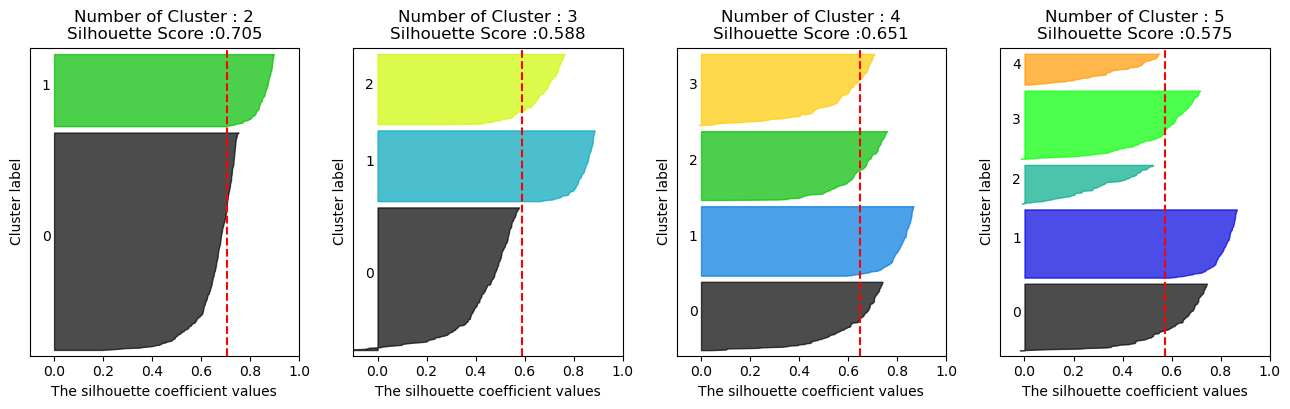

In [70]:
# make_blobs 를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1,
                  center_box = (-10.0, 10.0), shuffle = True, random_state = 1)

# 군집 개수가 2개, 3개, 4개, 5개 일 때의 군집별 실루엣 계수 평균 값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

붓꽃데이터 최적의 군집 계수 시각화

2개 베스트

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

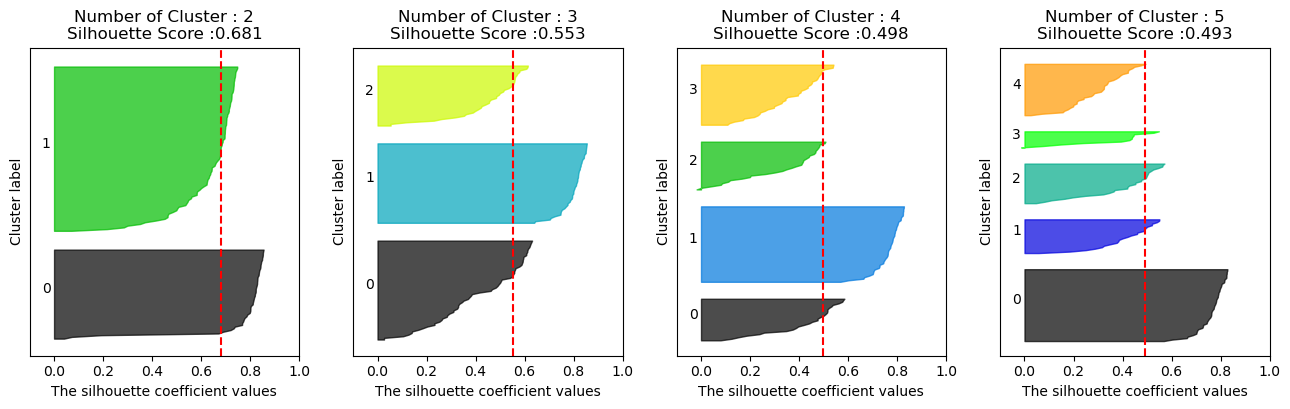

In [71]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

# 3. 평균 이동

**`새로운 데이터의 군집을 바탕으로 평균점을 이동하는 것`**

## 평균 이동(Mean Shift) 의 개요

데이터 생성  
`MeanShift` 사용  
bandwidth = 0.8  
cluster labels 출력

`bandwidth`
- h
    - 작으면 변동성이 큼(과소적함)
    - 크면 변동성이 작음 (과대적합)

In [118]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ',np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5]


bandwidth = 0.8  
cluster labels 출력

In [119]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))


cluster labels 유형 :  [0 1 2]


estimate_bandwidth 사용한 최적의 bandwidth 출력

`estimate_bandwidth`
- 최적의 band width 찾는 sklearn 함수

In [120]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth ,3 ))

bandwidth 값: 1.816


estimate_bandwidth 활용한 최적의 bandwidth 값 구하고, cluster labels 계수 구함

In [121]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth() 로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshigt = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


군집 산점도 시각화  
군집병 중심 표현

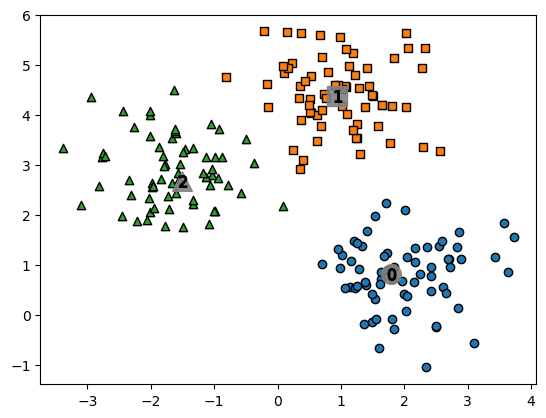

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label] 
    center_x_y = centers[label]
    
    # 군집 별로 다른 마커로 산점도 표시
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])
    
    # 군집 별 중심 표현
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'gray', alpha = 0.9,
    marker = markers[label])
    plt.scatter(x=center_x_y[0], y = center_x_y[1], s = 70, color='k', edgecolor='k', marker = '$%d$'%label)
    
plt.show()

실제 데이터와 분류 데이터 차이 확인

In [123]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       1                  67
1       0                  67
2       2                  66
Name: meanshift_label, dtype: int64


# 4. GMM(Gaussian Mixture Model)

**`데이터가 가우시안분포라는 가정을 하는 군집화 방법`**

## GMM을 이용한 붓꽃 데이터 세트 군집화

붓꽃 데이터 로드

In [77]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling 을 위해 DataFrame 으로 변환
irisDF = pd.DataFrame(data = iris.data, columns=feature_names)
irisDF['target'] = iris.target


n_component 갯수 3으로 설정하고 GaussianMixture 진행  
실제값과 분류 값의 비교

`n_component`
- 군집의 갯수

In [78]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels  
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑 됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means 클러스터링 과의 비교

In [79]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(iris.data)
kmaens_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmaens_cluster_labels   
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result) 


c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


함수 정의

In [80]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

## GMM 과 KMeans 의 비교

데이터 생성  
데이터 프레임으로 변환  
데이터 target 별로 시각화

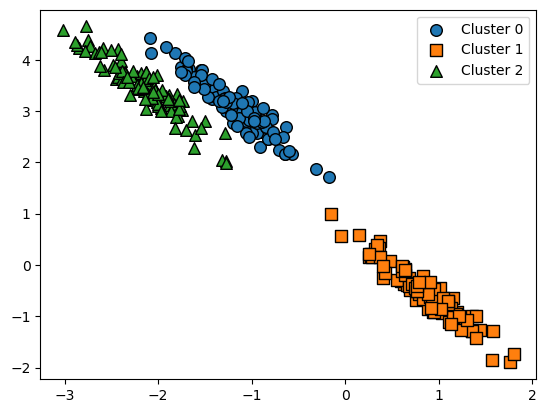

In [81]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 세트, 3개의 군집 세트, clsuter_std = 0.5 를 만듦
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, cluster_std = 0.5, random_state = 0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation = ([0.60834549, -0.63667341], [-0.40887718, 0.85253229])
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs() 의 y 결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data = X_aniso, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y 

# 생성된 데이터 세트를 target 별로 다른 마카로 표시해 시각화 됨
visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

KMeans 군집화 적용  
성능 별로이다.
- 평균거리 기반이기에 중심읋 기준으로 가장 가까운곳을 매핑한다
    - 즉, 원으로 매핑한다.

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


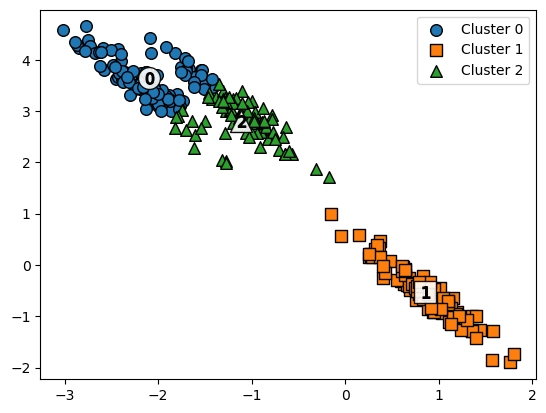

In [82]:
# 3개의 군집 기반 KMeans 를 X_aniso 데이터 세트에 적용 
kmeans = KMeans(3, random_state = 0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter = True)

GMM 적용

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


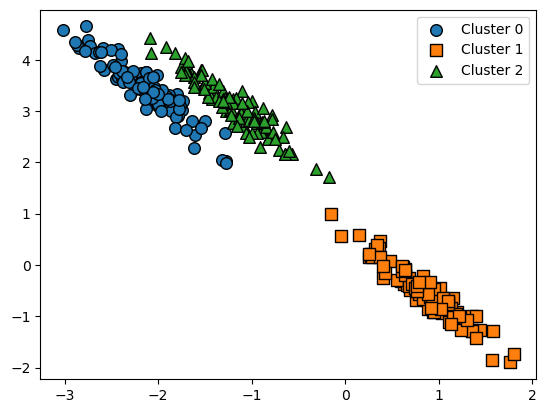

In [83]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components = 3, random_state = 0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label  

# GaussianMixture 는 cluster_centers_ 속성이 없으므로 iscenter 를 False 로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter = False)

KMeans 와 GMM 의 비교

GMM 이 더 잘 분류  
GMM이 KMeans 보다 더 유연하다

In [84]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# 5. DBSCAN

**`앱실론으로 분류하는 군집화 방법`**

## DBSCAN 적용하기 - 붓꽃 데이터 세트

DBSCAN 적용  
eps = 0.6, min_samples = 8  
실제 데이터 와 DBSCAN 비교

`eps`
- 일반적으로 1 이하 사용

In [85]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels    
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


PCA 로 피처 데이터 세트 2개로 변환  
plot 시각화

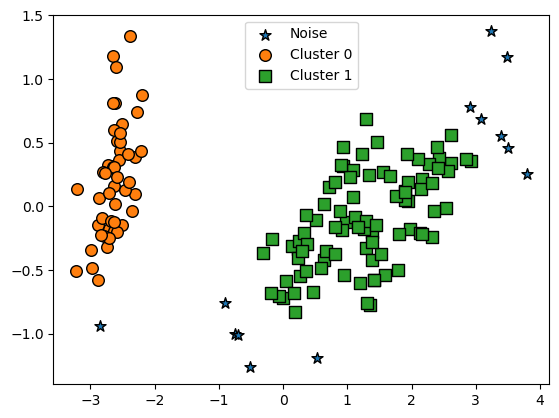

In [86]:
from sklearn.decomposition import PCA

# 2차원으로 시각화 하기 위해 PCA n_components = 2 로 피처 데이터 세트 변환
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_plot() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

eps = 0.8 로 증가  
실제 데이터와 분류 데이터 비교

In [87]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

# visualize_cluster_2d(irisDF, 'dbscan_cluster', centers = None, legend = True)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


eps = 0.6, min_samples = 16 으로 변경  
노이즈 더 증가

In [88]:
dbscan = DBSCAN(eps = 0.6, min_samples = 16, metric = 'euclidean')

## DBSCAN 적용하기 - make_circles() 데이터 세트

make_circles()   
- noise  
    - 노이즈 데이터 세트의 비율  
- factor  
    - 외부 원과 내부 원의 scale 비율

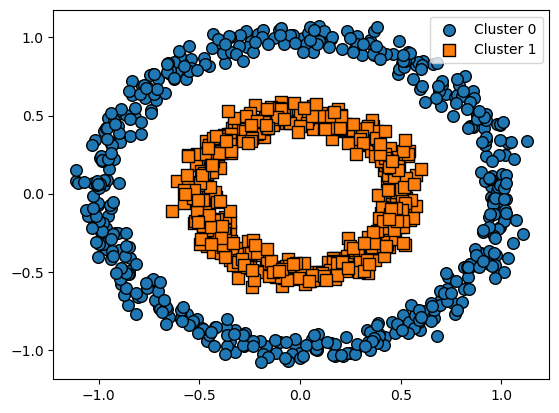

In [95]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y 


visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

KMeans 로 군집화 진행

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


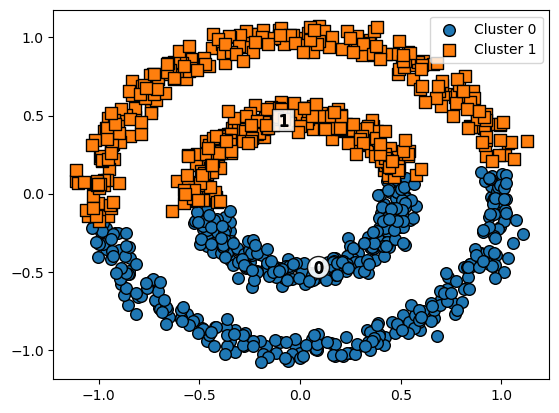

In [96]:
# KMeans 로  make_circless() 데이터 세트를 군집화 수랭.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels 

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter = True)

GMM 으로 군집화 진행

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


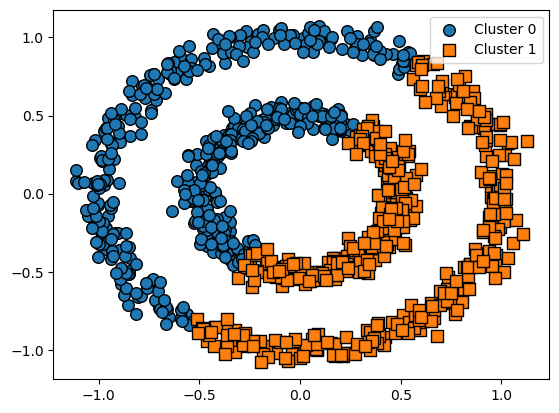

In [97]:
# GMM 으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2,  random_state = 0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter = False)

DBSCAN 으로 군집화 진행

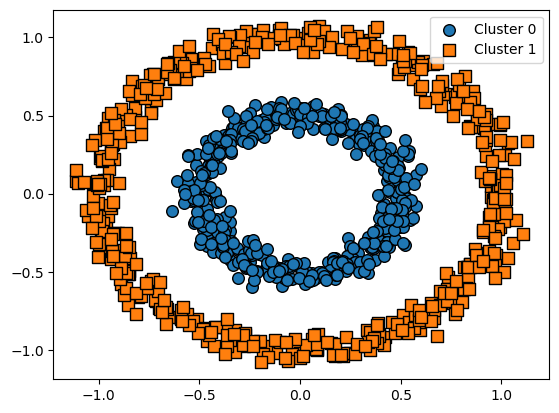

In [99]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter = False)

# 6. 군집화 실습 - 고객 세그먼테이션

In [124]:
import zipfile
import os
import shutil

def compress_directory(directory_path, output_filename):
    shutil.make_archive(output_filename, 'zip', directory_path)

def decompress_zipfile(input_filename, output_directory):
    with zipfile.ZipFile(input_filename, 'r') as zip_ref:
        zip_ref.extractall(output_directory)

# 디렉터리 압축
# compress_directory('C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/File/Source_file/online+retail', 'C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/File/Source_file/example_directory')

# # 압축된 디렉터리 해제
# decompress_zipfile('C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/File/Source_file/example_directory.zip', 'C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/File/Source_file/example_directory_extracted')


In [100]:
# import os

# def rename_file(old_filename, new_filename):
#     try:
#         os.rename(old_filename, new_filename)
#         print(f'파일명을 성공적으로 변경했습니다. {old_filename} → {new_filename}')
#     except FileNotFoundError:
#         print(f'파일이 존재하지 않습니다: {old_filename}')
#     except Exception as e:
#         print(f'파일명 변경 중 오류가 발생했습니다: {e}')

# # 예제 파일명 변경
# old_file = 'C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/File/Source_file/example_directory_extracted'
# new_file = 'C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/File/Source_file/sale+retail'

# rename_file(old_file, new_file)

파일이 존재하지 않습니다: C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/File/Source_file/example_directory_extracted


In [101]:
import pandas as pd
import datetime 
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io = 'C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/File/Source_file/sale+retail/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [102]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [103]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [104]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [105]:
retail_df = retail_df[retail_df['Country'] =='United Kingdom']
print(retail_df.shape)

(354321, 8)


In [106]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [107]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending = False)[:5])


17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [108]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [109]:
#   DataFrame 의 groupby()  의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceData 칼럼의 max() 에서 데이터 가공
# Frequency 는 InvoiceNo 칼럼의 count(), Monetary value sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate' : 'max',
    'InvoiceNo' : 'count',
    'sale_amount' : 'sum'        
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)

# groupby 된 결과 칼럼 값을 Recency, Frequency, Monetary 로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate' : 'Recency',
                                    'InvoiceNo' : 'Frequency',
                                    'sale_amount': 'Monetary'
                                    }
                         )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [110]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는 ', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


칼러3개의 분포 히스토 그랭 출력

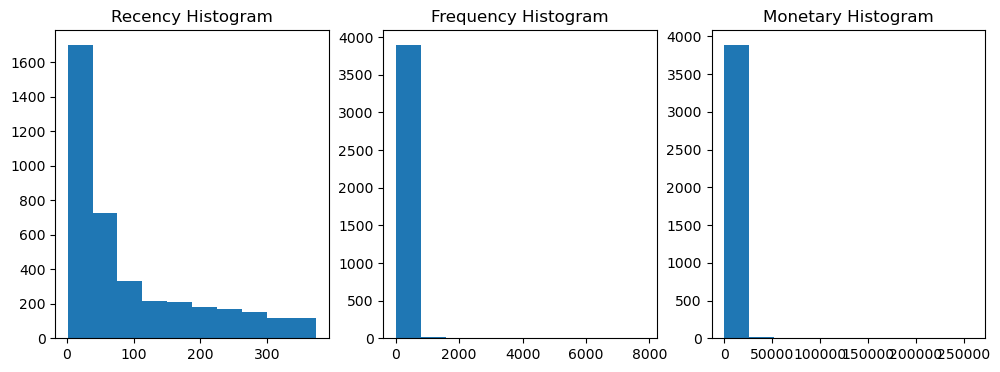

In [111]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (12, 4), nrows = 1, ncols = 3)

ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

plt.show()

칼럼의 백분위값 확인

In [112]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters = 3, random_state = 0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는 : 0.592


In [114]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\clust

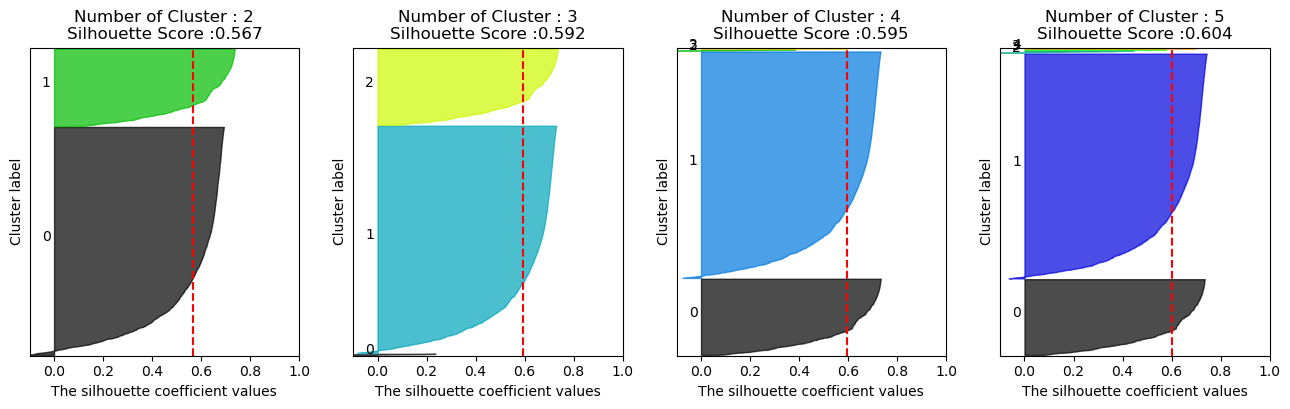

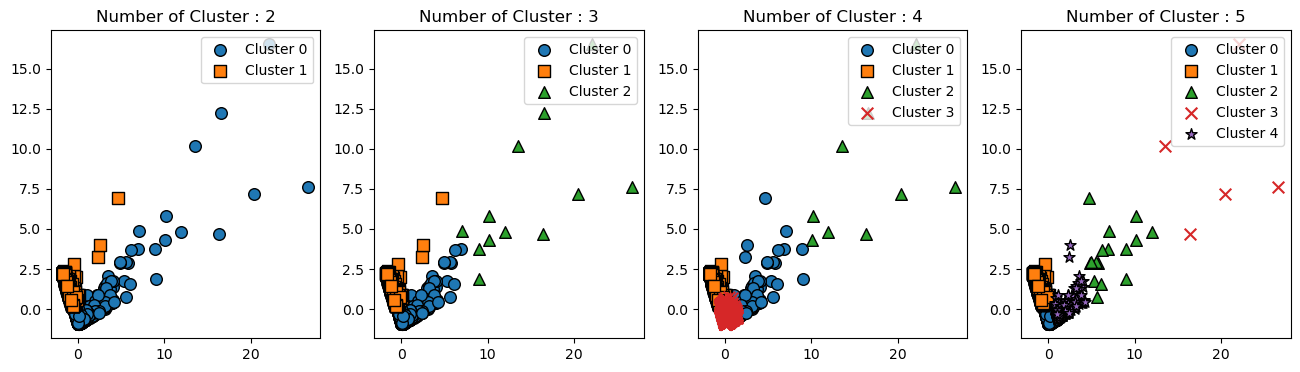

In [115]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Receny, Frequency, Monetary 칼럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters = 3, random_state = 0)
labels = kmeans.fit_predict(X_features_scaled)

cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는 : 0.303
